In [1]:
import pandas as pd

# Load Titanic dataset directly from the internet
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(url)

print(data.head())      # show first rows
print(data.shape)       # (rows, columns)


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
(8

In [3]:
# Select useful columns
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"]
X = data[features].copy()
y = data["Survived"]

# Handle missing values
X["Age"] = X["Age"].fillna(X["Age"].median())

# Convert Sex to numbers
X["Sex"] = X["Sex"].map({"male": 0, "female": 1})


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.8044692737430168


In [8]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[88 17]
 [18 56]]
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       105
           1       0.77      0.76      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



* Precision: This metric tells you, for each class, out of all the instances predicted as that class, how many actually belonged to that class. It answers the question: "When the model predicts a passenger survived (or didn't survive), how often is it correct?"

* Recall (Sensitivity): This metric tells you, for each class, out of all the actual instances of that class, how many were correctly identified by the model. It answers the question: "Of all the passengers who actually survived (or didn't survive), how many did the model correctly identify?"

* F1-score: This is the harmonic mean of precision and recall. It provides a single score that balances both precision and recall. A high F1-score indicates good performance on both.

* Support: This is simply the number of actual occurrences of each class in the y_test dataset. It shows how many instances of '0' (did not survive) and '1' (survived) were present in your test set.

* Accuracy: The overall accuracy of the model, which is the proportion of total correct predictions (both true positives and true negatives) among the total number of cases examined. This is the same accuracy score you saw earlier.

* Macro Avg: The average of precision, recall, and f1-score calculated independently for each class and then averaged across classes. It treats all classes equally, regardless of their support.

* Weighted Avg: The average of precision, recall, and f1-score weighted by the support (number of true instances) for each class. This is more useful when you have imbalanced classes, as it accounts for the number of instances in each class.

In [9]:
import pandas as pd

importance = pd.DataFrame({
    "feature": X.columns,
    "importance": model.feature_importances_
}).sort_values(by="importance", ascending=False)

print(importance)


  feature  importance
5    Fare    0.303445
1     Sex    0.274727
2     Age    0.252870
0  Pclass    0.081069
3   SibSp    0.051126
4   Parch    0.036762


From this output, we can conclude that for this Random Forest model predicting Titanic survival:

1. Fare (0.303445): The fare a passenger paid was the most significant predictor of survival. This might suggest that passengers who paid more (likely indicating a higher class or more resources) had a better chance of survival.

2. Sex (0.274727): Gender was the second most important feature, which aligns with historical accounts of "women and children first" during evacuations.

3. Age (0.252870): Age also played a substantial role, possibly due to survival priorities given to younger individuals or the elderly.

4. Pclass (0.081069): The passenger class is also important, as it often correlates with location on the ship and access to lifeboats.

5. SibSp (0.051126) and Parch (0.036762): The number of siblings/spouses and parents/children had less importance compared to the other features, though still contributed to the predictions.
In essence, the model found that 'Fare', 'Sex', and 'Age' were the most critical factors in determining a passenger's survival on the Titanic.

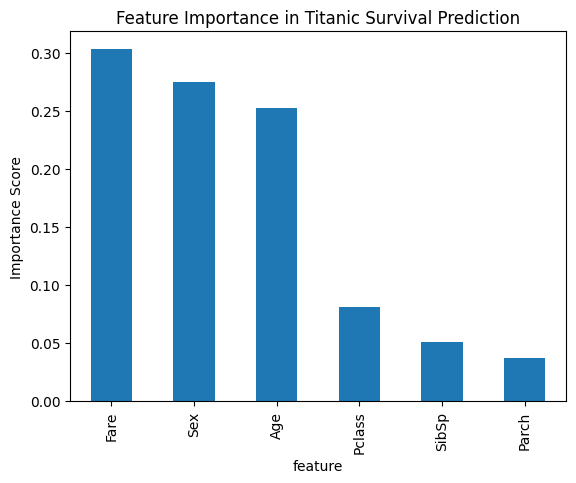

In [11]:
import matplotlib.pyplot as plt

importance.plot(kind="bar", x="feature", y="importance", legend=False)
plt.title("Feature Importance in Titanic Survival Prediction")
plt.ylabel("Importance Score")
plt.show()
